In [1]:
import matplotlib.pyplot as plt

import spotiphy
import numpy as np
import pandas as pd
import matplotlib as mpl
import scanpy as sc
import cv2
import pickle
import importlib as imp
imp.reload(spotiphy.segmentation)
imp.reload(spotiphy.deconvolution)
imp.reload(spotiphy.plot)

<module 'spotiphy.plot' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\plot.py'>

In [2]:
results_folder = 'Results/AD sample 221/'
adata_st = sc.read_visium("F:/Ziqian Zheng/Spotiphy_data/ST/Sample221/outs")
img = cv2.imread(f'F:/Ziqian Zheng/Spotiphy_data/ST/Sample221/Sample221.jpg')[:, :, [2, 1, 0]]
Segmentation = spotiphy.segmentation.Segmentation(img, adata_st.obsm['spatial'], out_dir=results_folder+'segmentation/')
Segmentation.segment_nucleus(save=True)
n_cell_df = Segmentation.n_cell_df
# with open(results_folder+f'segmentation/Segmentation.pkl', 'wb') as file:
#     pickle.dump(Segmentation, file)

anndata.py (1832): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Suppress the output of tensorflow prediction for tensorflow version 2.12.0>=2.9.0.



KeyboardInterrupt



In [186]:
search_direction = [[1, 0], [0, 1], [-1, 0], [0, -1], [2, 0], [0, 2], [-2, 0], [0, -2], [1, 1], [-1, 1], [-1, -1], [1, -1]]
boundary_dict = spotiphy.segmentation.cell_boundary(Segmentation.nucleus_df[['x', 'y']].values, img_size=img.shape[:2], max_dist=25, max_area=580, 
                                                    verbose=1, search_direction=search_direction, delta=2)
with open(results_folder+f'segmentation/boundary_dict.pkl', 'wb') as file:
    pickle.dump(boundary_dict, file)

r: 2	There are 54113 nuclei left.
r: 4	There are 54113 nuclei left.
r: 6	There are 54113 nuclei left.
r: 8	There are 54110 nuclei left.
r: 10	There are 54075 nuclei left.
r: 12	There are 53962 nuclei left.
r: 14	There are 53745 nuclei left.
r: 16	There are 44228 nuclei left.
r: 18	There are 29895 nuclei left.
r: 20	There are 20664 nuclei left.
r: 22	There are 14687 nuclei left.
r: 24	There are 10973 nuclei left.
r: 26	There are 8196 nuclei left.


100%|██████████| 10000/10000 [24:20<00:00,  6.84it/s] 


In [187]:
with open(results_folder+"type_list.txt", "r") as file:
    type_list = [line.strip() for line in file.readlines()]
print(type_list)
cell_proportion = np.load('Results/AD Sample 216/proportion.npy')
cell_number = spotiphy.deconvolution.proportion_to_count(cell_proportion, n_cell_df['cell_count'].values, multiple_spots=True)
Segmentation.nucleus_df = spotiphy.deconvolution.assign_type_spot(Segmentation.nucleus_df, Segmentation.n_cell_df, cell_number, type_list)
Segmentation.nucleus_df, _ = spotiphy.deconvolution.assign_type_out(Segmentation.nucleus_df, cell_proportion, Segmentation.spot_center, type_list,
                                                                    band_width=150)
with open(results_folder+f'segmentation/Segmentation.pkl', 'wb') as file:
    pickle.dump(Segmentation, file)

['Astro', 'BCell', 'CA', 'DG', 'Endo', 'L2/3 IT CTX', 'L4 IT CTX', 'L4/5 IT CTX', 'L5 IT CTX', 'L5 PT CTX', 'L5/6 IT CTX', 'L5/6 NP CTX', 'L6 CT CTX', 'L6 IT CTX', 'L6b CTX', 'Lamp5', 'Macrophage', 'Microglia', 'Neutrophil', 'Oligo', 'Pvalb', 'SUB', 'Sncg', 'Sst', 'Sst Chodl', 'TCell', 'Vip']


In [30]:
imp.reload(spotiphy.plot)

<module 'spotiphy.plot' from 'C:\\Users\\zzheng92\\Desktop\\Spotiphy\\spotiphy\\plot.py'>

In [7]:
results_folder = 'Results/AD sample 221/'
with open(results_folder+"type_list.txt", "r") as file:
    type_list = [line.strip() for line in file.readlines()]
with open(results_folder + 'segmentation/boundary_dict.pkl', 'rb') as file:
    boundary_dict = pickle.load(file)
with open(results_folder+f'segmentation/Segmentation.pkl', 'rb') as file:
    Segmentation = pickle.load(file)
plot_visium = spotiphy.plot.Plot_Visium(segmentation=Segmentation, boundary_dict=boundary_dict, type_list=type_list)
# plot_visium.plot_legend(save=results_folder+'legend.png')

In [8]:
# adata_st = sc.read_visium("F:/Ziqian Zheng/Spotiphy_data/ST/Sample216/outs")
# n_cell_df = Segmentation.n_cell_df
# df = pd.DataFrame({'ID':adata_st.obs_names, 'n_cells_per_spot':n_cell_df['cell_count']})
# df.to_csv(results_folder+'n_cells_per_spot.csv', index=False)

Adding cells.


48219it [00:00, 267883.94it/s]
100%|██████████| 48219/48219 [00:00<00:00, 281469.92it/s]


Adding spots.
Saving the image.


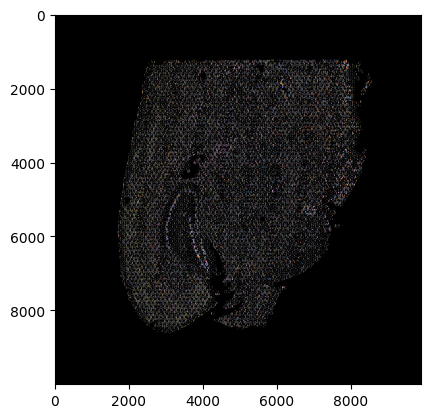

In [11]:
plot_visium.plot(background=False, save=results_folder+'plot_visium_out_nuc_221.png', spot_color=(200, 200, 200), shape='nucleus', 
                 cell='out', boundary='out')

In [7]:
Segmentation.nucleus_df['in_spot'].value_counts()

in_spot
False    31643
True     16576
Name: count, dtype: int64